## Exercises - Jorge Chacón y Jennifer Chcón

## Problem 1.
Calculate:


 - The pressure of the plasma permeating the Solar corona. How does it compare to Earth's atmospheric pressure at the sea level? The number density of the Solar corona is $n=10^9\,\rm cm^{-3}$ and its temperature is $T=2\times 10^6\,\rm K$.
 
 
 - The polytropic index of carbon-monoxide (CO) gas. Hint: Get the degrees of freedom first.


 - The mean particle mass (mean molecular weight) of air in our atmosphere (remember Nytrogen is the most abundant element). Once calculated, add it to the phase diagram $T$ vs. $\mu$ shown in class. How does the value compare to that of atomic hydrogen?


 - The Reynolds number of the blood flow in the aorta. Hint: Use the Internet to get the parameters you need.

### Solución:

#### 1.1 Presión
Para la presión del plasma en la corona solar utilizaremos la ecuación de estado del gas ideal (EOS)
$$p = n\,k_B\,T,$$
con los datos:

$$ n_{\rm psc} =10^9\,\rm cm^{-3}$$ 
$$T_{\rm psc} = 2\times 10^6\,\rm K = 10^{6.3} \, \rm K $$

Además, conocemos que a nivel del mar la presión atmosférica es de 1 atm y la temperatura 15°C, por tanto, usaremos:
$$ n_{\rm atm} = 2.548 \times 10^{19} \, \rm cm^{-3} = 10^{19.4} \, \rm cm^{-3} $$
$$ T_{\rm atm} = 288.15 \,\rm K = 10^{2.46} \, \rm K$$

A continuación las presiones estarán en $[\rm dyne\,cm^{-2}]$:

In [3]:
# Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función presion (x,y)
def pressure(x,y):
    kb=1.38e-16 #constante de boltzmann
    return (x*kb*y)

# Imprimimos las presiones
print('Presión del plasma que penetra la corona Solar:', "{:0.5e}".format(pressure(10**9,2e6)))
print('Presión atmosférica en la tierra al nivel del mar:', "{:0.5e}".format(pressure(2.548e19,288.15)))

Presión del plasma que penetra la corona Solar: 2.76000e-01
Presión atmosférica en la tierra al nivel del mar: 1.01320e+06


Existe una diferencia de 7 ordenes de magnitud. Comparemos estas presiones en un mapa de calor.

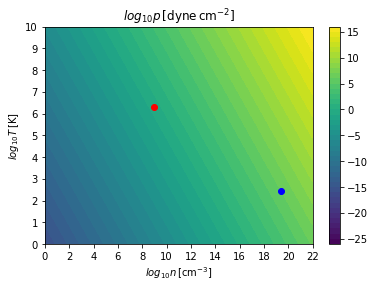

In [4]:
# cambiamos las variables a escala logarítmica

# Plasma Corona Solar (psc)
n1 = 9.
T1 = 6.30103

# Atmósfera terrestre (atm)
n2 = 19.4062
T2 = 2.46

# Creamos un grid 2D con las variables n and T como X y Y.
number_density = np.arange(0,22,0.01)
temperature = np.arange(0,10,0.01)

# Mapa de presiones dada la densidad y temperatura
X, Y = np.meshgrid(number_density, temperature) 

# Calcula la presión
pressure_1D = np.array(pressure(np.ravel(10**X), np.ravel(10**Y)))
Z = pressure_1D.reshape(X.shape)
# ravel(num**X): X elevado al exponente 10

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(-26, 16, 43), cmap='viridis')

# Añadimos los puntos en el gráfico
ax.scatter(n1, T1, c='red') # Plasma Corona Solar
ax.scatter(n2, T2, c='blue') # Atmósfera terrestre a nivel del mar
    
# Add a colorbar and customise axes
fig.colorbar(cp) 
ax.set_title(r'$ log_{10} p\,\rm [dyne\,cm^{-2}$]') # título del gráfico
ax.set_xticks(np.arange(0,23,2)) # marcas en el eje x
ax.set_xlabel(r'$log_{10} n\,\rm [cm^{-3}]$') # nombre del eje x
ax.set_yticks(np.arange(0,11,1)) # marcas en el eje y
ax.set_ylabel(r'$log_{10} T\,\rm [K]$') # nombre del eje y
plt.show()

#### 1.2 Polytropic index
El índice politrópico (polytropic index) en función de los grados de libertad es:

$$\gamma = 1+\frac{2}{f},$$

El CO es una molécula diatómica que tiene 7 grados de libertad: 3 traslacionales, 2 rotacionales y 2 vibracionales.

Por tanto,
$$ \gamma = \frac{9}{7} $$

In [5]:
# Definimos una función 
def polytropic_index(f):
    return (1+ 2/f)

print('El polytropic index del CO es: ', "{:0.5}".format(polytropic_index(7)))

El polytropic index del CO es:  1.2857


###### 1.3 Mean particle mass
La masa media de partículas (mean particle mass) está dada por:

$$\frac{1}{\mu}=\sum_i{\frac{x_i}{A_i}}\left(1+Z_i\right),$$

donde $x_i$ es la fracción correspondiente a cada elemento $i$, $A_i$ es el número másico del elemento $i$ y $Z_i$ es la carga del núcleo.

La atmósfeta terrestre está compuesta principalmente por:
- Nitrógeno ($N_2$) 78%
- Oxígeno ($O_2$) 21% 
- Argón ($Ar$) 0.934%

donde se excluyeron los elementos que tienen menos de 1% de aporte (a excepción del argón).

$$\frac{1}{\mu}= {\frac{x_{N}}{A_{N}}}\left(1+Z_N\right) + {\frac{x_{O}}{A_{O}}}\left(1+Z_O\right) + {\frac{x_{Ar}}{A_{Ar}}}\left(1+Z_{Ar}\right) = 0.6082 \:\Longrightarrow\: \mu = 1.64418 $$

In [6]:
# Definimos una función
def summ_mpm(x,A,Z):
    return ((x/A)*(1+Z))

mu = summ_mpm(0.78,14,7) + summ_mpm(0.21,16,8) + summ_mpm(0.0934,40,18)
mu = 1./mu

print('Mean particle mass of air:' , "{:0.5}".format(mu))

Mean particle mass of air: 1.6442


In [7]:
# Create a 2D grid with n and T as X and Y.
mu = np.arange(0,30,0.01) # llena el arreglo
temperature = np.arange(0,10,0.01) # llena el arreglo

X, Y = np.meshgrid(mu, temperature) # crea la grilla

# Compute pressure on the grid
mean_particle_mass_1D = np.array((np.ravel(X), np.ravel(10**Y)))
Z = mean_particle_mass_1D.reshape(X.shape)

# Plot pressure
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')

# Add a colorbar and customise axes
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$ log_{10} T\,\rm [K]$')
plt.show()

ValueError: cannot reshape array of size 6000000 into shape (1000,3000)

## Problem 2.
Considering the example of the swimming fish we saw in class, calculate the Reynolds numbers for different swimming speeds and make a plot of $R_{\rm e}$ vs. speed. Indicate the laminar and turbulent regimes on the plot. At which speed does the fish start generating a turbulent flow in sea water?

### Solución:

El número de Reynolds está dado por:

$$R_{\rm e} = \frac{v\,l}{\nu} = \frac{\rho\,v\,l}{\mu}$$

donde $l$ es la longitud característica del flujo. 

$R_e$ depende linealmente de $v$, para hacer el plot de $R_e$ vs. $v$ tomaremos valores de velocidad entre 0 y 25 $m/s$, en pasos de 1.

La viscosidad dinámica del agua es:

$$\mu=0.00122\,\rm N\,m^{-2}\,s$$

Y su densidad a $15\,\rm C$ is:

$$\rho=1026\,\rm kg\,m^{-3}$$

Además, asumiremos que $l$ es constante, tal que:

$$l=1\,\rm m$$



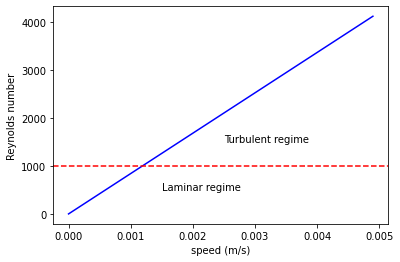

In [8]:
# Definimos la función para calcular el numero de Reynolds
def Re_number(vel):
    # Parámetros en unidades SI 
    mu=0.00122
    le=1
    rho=1026
    return (rho*vel*le)/(mu)

vel = np.arange(0,0.005,0.0001) # velocidades entre 0 y 0.005 para que se vea mejor el gráfico
Re = Re_number(vel) # números de Reynolds

# Make plot
fig,ax=plt.subplots(1,1)
ax.plot(vel, Re, c='blue')

#ax.set_title(r'Re number versus speed')
ax.set_ylabel(r'Reynolds number')
ax.set_xlabel(r'speed (m/s)')
plt.axhline(y=1000,ls='--',c='red')
plt.text(0.0015, 500, 'Laminar regime')
plt.text(0.0025, 1500, 'Turbulent regime')
plt.show()

Se consideró que la transición del régimen laminar al turbulento occurre a $R_{\rm e}\sim 10^3$.

Con este dato, calculamos la velocidad a la que ocurre esta transición, para una unidad de longitud del flujo:

$$ v  = \frac{R_{\rm e} \mu}{\rho\,l} = \frac{1000 \times 0.00122}{1026 \times 1} = 0.00189 \, \rm m/s$$

## Problem 3.
Download the full dataset from the 2D turbulence simulation that we analysed in class (TURB_DRIVE) and:

 - Calculate the rms flow velocity and the corresponding rms Mach number as a function of time (see equations in the lecture notebook).
 
 
 - Save the data into a text file as shown in the example in class, and then make a plot of rms Mach number versus time. Remember that the sound speed of the simulation is $c_{\rm iso}=10\,\rm km\,s^{-1}$.
 
 
 - Based on the result above, is the gas subsonic or supersonic in this simulation?
 
 
 - Calculate the gas pressure using the isothermal equation of state ($p=\rho\,c_{\rm iso}^2$), and make and print a 2D map of the pressure for file #70.
 
 
 - Now that you have the pressure, you can calculate the so-called plasma beta of the gas, which is a dimensionless parameter that relates thermal, $p$, and magnetic pressure $\left(\frac{B^2}{8\,\pi}\right)$. Compute the plasma beta and make and print a 2D map for file #70.
 
 $$\beta = \frac{8\,\pi\,p}{B^2}$$
 

Full Data: https://www.dropbox.com/sh/gt3grmb24no04lp/AAAxAZGErA1E1cpZ0xENF1Xma?dl=0

### Solución:

El rms turbulence Mach number está dado por:

$$M_{\rm turb} = \frac{v_{\rm rms}}{c_{\rm sound}},$$

donde $v_{\rm rms}=\overline{v^2}$, y $c_{\rm sound}$ es la velocidad del sonido del gas.

In [9]:
# Utilizamos la función definida en la Sesion 3 para leer los datos
def read_my_vtk(file_name):
    """Read Pluto's VTK simulation files and returns the variables in CGS units"""
    
    # Path to files
    input_directory= "./TURB_DRIVE/" #"../../TURB_DRIVE/"
    file_name = file_name
    times_file = "vtk.out" # para los tiempos
    
    # Normalisation values
    l0 = 3.086e+18                    # Length is 1pc
    v0 = 1.e+6                        # Velocity is 10km/s
    rho0 = 1.66e-24                   # In g/cm^3
    mu = 6.72E-01                     # Mean particle mass
    mm = 1.660E-24                    # 1 Atomic mass unit
    kb = 1.380E-16                    # in CGS units
    tem0 = (mu*(mm*(v0**2))/kb)       # in K
    bfi0 = 4*math.pi*(rho0*(v0**2))   # in Gauss

    # Standard VTK loading routines
    reader= vtk.vtkDataSetReader()
    reader.SetFileName(input_directory+file_name)
    reader.ReadAllVectorsOn()
    reader.ReadAllScalarsOn()
    reader.Update()

    # Get data using hearder information
    data = reader.GetOutput() 
    dens = data.GetCellData().GetArray("rho")
    vel1 = data.GetCellData().GetArray("vx1")
    vel2 = data.GetCellData().GetArray("vx2")
    bfi1 = data.GetCellData().GetArray("vx1")
    bfi2 = data.GetCellData().GetArray("vx2")
    
    # Get dimensions, needed to get 3D arrays, instead of 1D vectors
    dim = data.GetDimensions()
    vec = list(dim)
    vec = [i-1 for i in dim]
    
    # Copy data into numpy arrays
    rho = np.array(dens)
    vx1 = np.array(vel1)
    vx2 = np.array(vel2)
    Bx1 = np.array(bfi1)
    Bx2 = np.array(bfi2)
    
    # Reshape them into 3D arrays
    rho = rho.reshape(vec[0],vec[1],order='F')
    vx1 = vx1.reshape(vec[0],vec[1],order='F')
    vx2 = vx2.reshape(vec[0],vec[1],order='F')
    Bx1 = Bx1.reshape(vec[0],vec[1],order='F')
    Bx2 = Bx2.reshape(vec[0],vec[1],order='F')
    
    # In astrophysical units
    rho = rho*rho0       # Gas density in g/cm^3
    nrh = rho/(mu*mm)    # Gas number density in cm^-3
    vx1 = vx1*v0/1.e5    # X-velocity component in km/s
    vx2 = vx2*v0/1.e5    # Y-velocity component in km/s
    Bx1 = Bx1*bfi0       # X-Bfield component in G
    Bx2 = Bx2*bfi0       # Y-Bfield component in G
    
    # Times
    times = ascii.read(input_directory+times_file)
    times = np.array(times['col2'])*l0/v0 # 1D array containing the simulation time in seconds
    
    return times, rho, nrh, vx1, vx2, Bx1, Bx2
    # tr1 is a cloud material tracer

In [14]:
# Guardamos los calculos de velocidad rms y mach number en un archivo txt
from astropy.io import ascii
import math
import vtk

f = open('averages2.txt', 'w')
f.write("Time  Vrms  Mach\n")

for i in range(0,100,1):
    times, dens, number_dens, velx, vely, Bfieldx, Bfieldy = read_my_vtk('data.00{:02}.vtk'.format(i))
    
    vel_rms = np.mean((velx**2)*(vely**2))
    mach = vel_rms/10000

    f.write("{:.5e} {:.5e} {:.5e}\n".format(times[i],vel_rms,mach))

f.close()

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(, energies, c='blue')

ax.set_title(r'$E_k$ versus $\lambda$')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$E_k$')
plt.show()